<a href="https://colab.research.google.com/github/kokochka/veggies-classifier/blob/main/veg_classifier_notebook_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
# @title Устанавливаем фреймворки
!pip install tensorflow


In [13]:
# @title Імпортуємо бібліотеки

import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import os
import seaborn as sns
import random
import shutil
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix


# API

Завантажуємо папку з тестовими зображеннями за допомогою API ключа

---



In [17]:
# @title Знаходимо kaggle.json

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [16]:
# @title Завантажуємо теку з тестовими зображеннями

from kaggle.api.kaggle_api_extended import KaggleApi

# Авторизація в Kaggle
api = KaggleApi()
api.authenticate()

dataset_path = 'vegetable-image-dataset/test'
api.dataset_download_files('misrakahmed/vegetable-image-dataset', path=dataset_path, unzip=True)


Dataset URL: https://www.kaggle.com/datasets/misrakahmed/vegetable-image-dataset


In [18]:
# @title Визначаємо шляхи до моделі та тестових зображень

model_path = '/content/vegetable_classifier_epoch_30_val_acc_0.98.h5'
images_path = '/content/vegetable-image-dataset/test'

In [19]:
# @title Завантаження натренованої моделі

model = load_model(model_path)

In [30]:
# @title Корзина для непотрібних файлів
folder_path = '/content/todelete/delete'

# Перевірка чи тека існує
if os.path.exists(folder_path):
    # Удаление папки и её содержимого
    shutil.rmtree(folder_path)
    print(f"Folder {folder_path} and all content cleared.")
else:
    print(f"Folder {folder_path} doesn't exist.")
os.makedirs(folder_path, exist_ok=True)
print(f"Folder {folder_path} created :)")

Folder /content/todelete/delete and all content cleared.
Folder /content/todelete/delete created :)


# ⏸ First method for predictring test

Do not use it anymore

In [ ]:
# @title Defining classes according to dataset structure

class_names = ['Bean', 'Bitter Gourd',
               'Bottle Gourd', 'Brinjal',
               'Broccoli', 'Cabbage',
               'Capsicum', 'Carrot',
               'Cauliflower', 'Cucumber',
               'Papaya', 'Potato',
               'Pumpkin', 'Radish', 'Tomato']

In [26]:
# @title Pre-processing of images

def load_and_preprocess_image(img_path, target_size=(150, 150)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    return img_array

img_height, img_width = 150, 150

In [27]:
# @title Launching predictring for user-uploaded images

for img_name in os.listdir(images_path):
      img_path = os.path.join(images_path, img_name)
      img = load_and_preprocess_image(img_path)
      prediction = model.predict(img)[0]

      # Prediction output for each image
      print(f'Prediction for {img_name}:', prediction)

      # building scheme using seaborn
      sns.barplot(x=class_names, y=prediction)
      plt.title(f'Predictions for {img_name}')
      plt.xlabel('Class')
      plt.ylabel('Probability')
      plt.show()

NameError: name 'image' is not defined

# ♌ New method for predicting check

In [29]:
# @title Launching files, predicting test

img_height, img_width = 150, 150

# Paths in environment
model_path = '/content/vegetable_classifier_epoch_30_val_acc_0.98.h5'
images_path = '/content/vegetable-image-dataset/test'

# Loading saved model
model = load_model(model_path)


# Set parameters for image-generator
test_datagen = ImageDataGenerator(rescale=0.2)  # Нормализация изображений

# Creating image-generator for test pictures
test_generator = test_datagen.flow_from_directory(
    images_path,
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Starting prediction
predictions = model.predict(test_generator)
predicted_classes = predictions.argmax(axis=1)

# true-classes labels
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Accuracy calculation (accuracy)
accuracy = accuracy_score(true_classes, predicted_classes)
print(f'Accuracy: {accuracy:.2f}')



Found 3000 images belonging to 15 classes.
94/94 [==============================] - 45s 473ms/step
Accuracy: 0.62


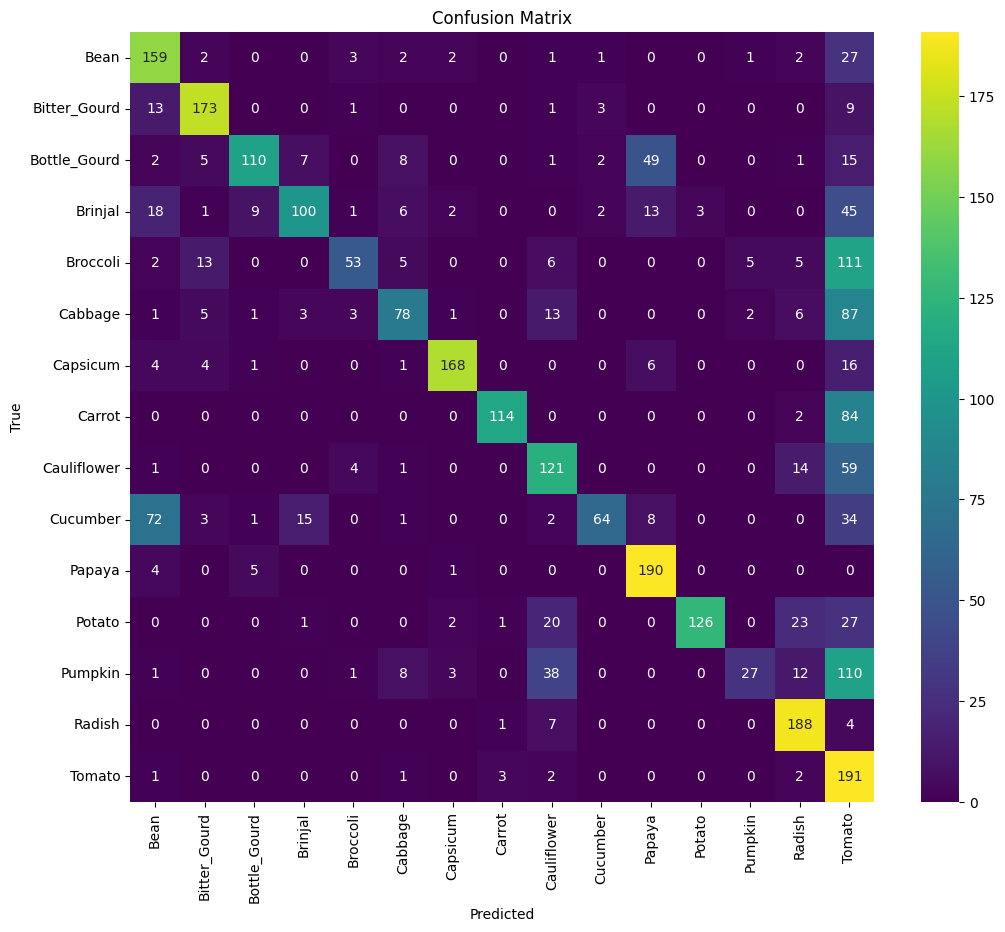

In [31]:
# @title Building confusion matrix

# Building loss matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Loss matrix visualisation
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
